Text(0.5, 1.0, 'Original image')

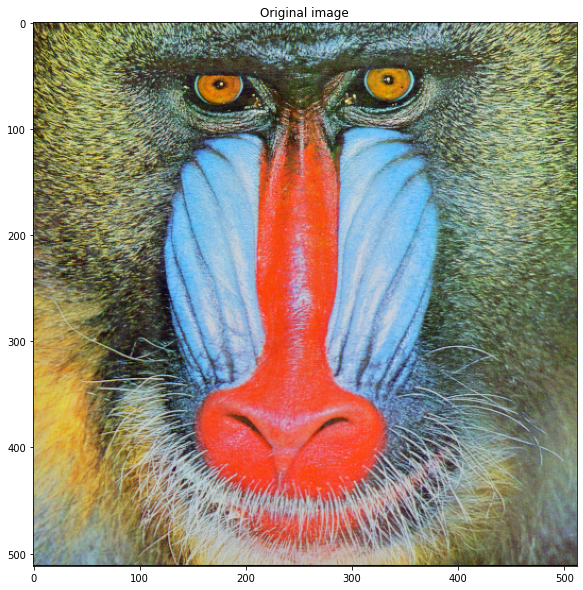

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://i.pinimg.com/originals/62/d9/95/62d995e13a183d457d284fecb8c3f0e1.png'
response = requests.get(url)
input_img = Image.open(BytesIO(response.content))

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(input_img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [ ]:
def transformRGB2YIQ(imgRGB: np.ndarray) -> np.ndarray:
    """
    Converts an RGB image to YIQ color space
    :param imgRGB: An Image in RGB
    :return: A YIQ in image color space
    """
    yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
                             [0.59590059, -0.27455667, -0.32134392],
                             [0.21153661, -0.52273617, 0.31119955]])
    OrigShape=imgRGB.shape
    return np.dot(imgRGB.reshape(-1,3), yiq_from_rgb.transpose()).reshape(OrigShape)

    pass


def transformYIQ2RGB(imgYIQ: np.ndarray) -> np.ndarray:
    """
    Converts an YIQ image to RGB color space
    :param imgYIQ: An Image in YIQ
    :return: A RGB in image color space
    """
    yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
                             [0.59590059, -0.27455667, -0.32134392],
                             [0.21153661, -0.52273617, 0.31119955]])
    OrigShape=imgYIQ.shape
    return np.dot(imgYIQ.reshape(-1,3), np.linalg.inv(yiq_from_rgb).transpose()).reshape(OrigShape)

    pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original image')

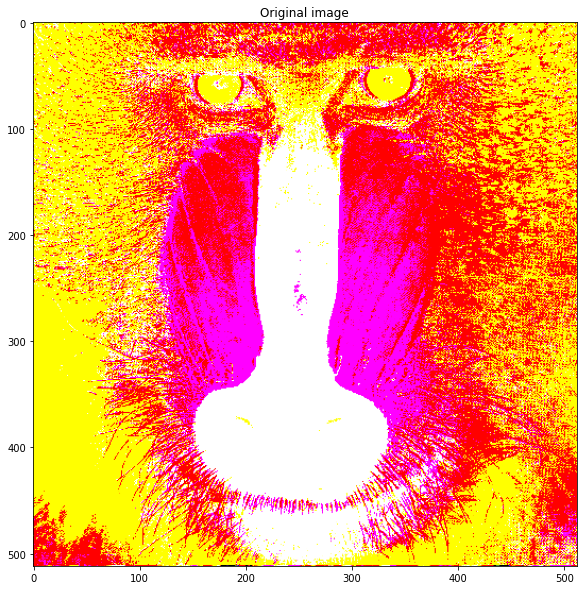

In [ ]:
# Convert RGB to YIQ image
input_img = np.asarray(input_img)
output_img = transformRGB2YIQ(input_img)


# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(output_img, cmap='gray', vmin=0, vmax=255)
plt.title("YIQ Image")